In [28]:
import matplotlib.pyplot as plt
# import numpy as np
import csv
# from sklearn.cluster import KMeans

def kClusters(k: int, edges):
    clusteredEdges={
     "x": edges['x'].copy(),
     "y": edges['y'].copy(),
     "distance": edges['distance'].copy()   
    }
    for _ in range(0, k-1):
        maxDistance = max(clusteredEdges["distance"])
        maxIndex = clusteredEdges["distance"].index(maxDistance)
      
        del clusteredEdges["distance"][maxIndex]
        del clusteredEdges["x"][2 * maxIndex]
        del clusteredEdges["x"][2 * maxIndex]
        del clusteredEdges["y"][2 * maxIndex]
        del clusteredEdges["y"][2 * maxIndex]
      
    return clusteredEdges

def loadData(file: str):

    vertexData = {
        "a": [],  # x
        "b": [],  # y
        "s": [],  # radius
    }

    edgeData = {"x": [], "y": [], "distance": []}  # first vertex  # second vertex

    mstData = {"x": [], "y": [], "distance": []}  # first vertex  # second vertex


    with open(f"data/{file}/v.csv") as vertexFile:
        vreader = csv.reader(vertexFile)
        for row in vreader:
            vertexData["a"].append(float(row[0]))
            vertexData["b"].append(float(row[1]))
            vertexData["s"].append(max(float(row[2]), 50))


    with open(f"data/{file}/e.csv") as edgeFile:
        ereader = csv.reader(edgeFile)

        for row in ereader:
            # add v1 (source)
            edgeData["x"].append(float(row[0]))
            edgeData["y"].append(float(row[1]))
            # add v2 (destination)
            edgeData["x"].append(float(row[2]))
            edgeData["y"].append(float(row[3]))
            # add distance
            edgeData["distance"].append(float(row[4]))


    with open(f"data/{file}/mst.csv") as mstFile:
        mstreader = csv.reader(mstFile)

        for row in mstreader:
            # add v1 (source)
            mstData["x"].append(float(row[0]))
            mstData["y"].append(float(row[1]))
            # add v2 (destination)
            mstData["x"].append(float(row[2]))
            mstData["y"].append(float(row[3]))
            # add distance
            mstData["distance"].append(float(row[4]))

    return ( vertexData, edgeData, mstData )


def find_connected_components(vertexData, edgeData):
    edges = []
    for i in range(0, len(edgeData['x']), 2):
        edges.append(((edgeData['x'][i], edgeData['y'][i]), (edgeData['x'][i+1], edgeData['y'][i+1])))

    vertices = []
    for i in range(len(vertexData["a"])):
        vertices.append((vertexData["a"][i], vertexData["b"][i]))
    
    # We want to only iterate over the iterator once
    adj = {v: [] for v in vertices}
    for edge in edges:
        adj[edge[0]].append(edge[1])
        adj[edge[1]].append(edge[0])

    visited = set()

    def dfs(v, component):
        visited.add(v)
        component.add(v)

        for n in adj[v]:
            if n not in visited:
                dfs(n, component)

    components = []

    for v in adj.keys():
        # print('iteration 1', v, v in visited)
        if v not in visited:
            component = set()
            dfs(v, component)
            components.append(list(component))

    # print('length components', len(components))

    componentData = []
    for component in components:
        newCData = {"x": [], "y":[]}
        for item in component:
            newCData['x'].append(item[0])
            newCData['y'].append(item[1])
        componentData.append(newCData)
    return componentData


[[(2.0, -1.0), (2.0, -2.0), (2.0, 1.0), (0.0, 0.0), (2.0, 0.0), (1.0, -1.0), (1.0, -2.0), (3.0, 0.0), (1.0, 0.0), (0.0, -1.0)]]
[[(2.0, -1.0), (2.0, -2.0), (2.0, 1.0), (0.0, 0.0), (2.0, 0.0), (1.0, -1.0), (1.0, -2.0), (3.0, 0.0), (1.0, 0.0), (0.0, -1.0)]]
[[(0.0, -1.0), (1.0, -1.0), (0.0, 0.0)], [(2.0, -1.0), (2.0, -2.0), (2.0, 1.0), (2.0, 0.0), (3.0, 0.0), (1.0, 0.0)], [(1.0, -2.0)]]


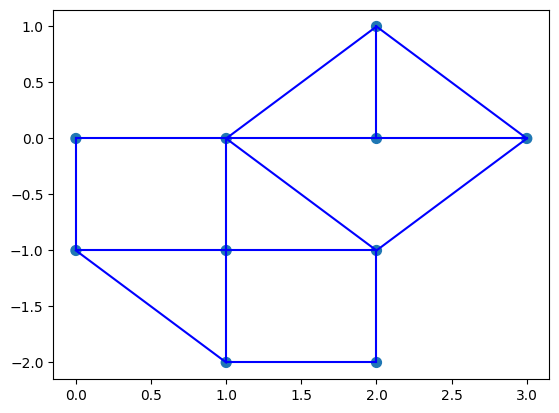

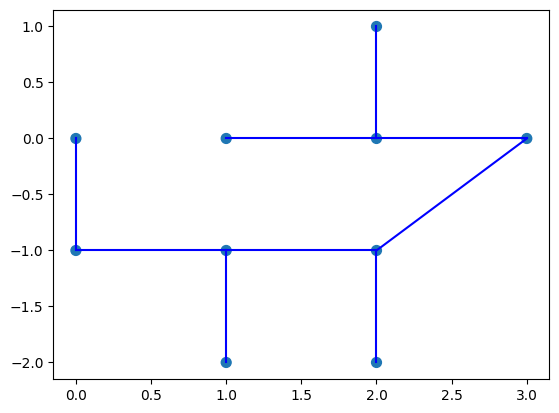

In [29]:

( vertices, edges, mst) = loadData('material')

clustered = kClusters(3, mst)
print(find_connected_components(vertices,edges))
print(find_connected_components(vertices,mst))
print(find_connected_components(vertices,clustered))

plt.scatter('a', 'b', 's', data=vertices)
for i in range(0,len(edges['x']), 2):
    plt.plot([edges['x'][i], edges['x'][i+1]], [edges['y'][i], edges['y'][i+1]], color="blue")
plt.show()
plt.scatter('a', 'b', 's', data=vertices)

for i in range(0,len(mst['x']), 2):
    plt.plot([mst['x'][i], mst['x'][i+1]], [mst['y'][i], mst['y'][i+1]], color="blue")
plt.show()

In [ ]:
# Visualize graph with all noises
def visualize(dataName: str):
    # Load in data
    ( vertices, edges, mst) = loadData(dataName)

    # Scatter for vertices only
    plt.scatter("a", "b", "s", data=vertices)

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])
    plt.title('Scatter plot for vertices')
    plt.show()

    plt.scatter("a", "b", "s", data=vertices)

    for i in range(0,len(edges['x']), 2):
        plt.plot([edges['x'][i], edges['x'][i+1]], [edges['y'][i], edges['y'][i+1]], linewidth=0.002)

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])

    plt.title('Graph for all edges')

    plt.show()

    plt.scatter("a", "b", "s", data=vertices)
    for i in range(0,len(mst['x']), 2):
        plt.plot([mst['x'][i], mst['x'][i+1]], [mst['y'][i], mst['y'][i+1]], linewidth=0.5)

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])

    plt.title('Graph for MST edges')
    plt.show()

    comp = find_connected_components(mst)
    # data = list(zip(mst['x'], mst['y']))
    # kmeans = KMeans(n_clusters=2)
    # kmeans.fit(data)

    plt.scatter("a", "b", "s",  data=vertices)
  
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])

    plt.title('MST Clustering')
    plt.show()


In [ ]:
# Circles 100 vertices Low Noise
print ('circles 100 vertices low noise')
visualize('circles-100-low')

# Circles 100 vertices Medium Noise
print ('circles 100 vertices medium noise')
visualize('circles-100-medium')

# Circles 100 vertices High Noise
print ('circles 100 vertices high noise')
visualize('circles-100-high')

circles 100 vertices low noise


FileNotFoundError: [Errno 2] No such file or directory: 'data/circles-100-low/v.csv'

In [ ]:
find_connected_components()